In [1]:
from matplotlib import colors
import mitsuba as mi 
mi.set_variant("cuda_ad_rgb")
import drjit as dr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PDE2D.Coefficient import *
from PDE2D.utils import *
from mitsuba import Point2f, Float

In [2]:
from PDE2D.Coefficient.elliptic_disk_map import *
fd_step = 1e-3
res_sqr = 15 
points = build_grid_squares(50,[res_sqr,res_sqr],[[-1,-1], [1,1]])
radius = 1
points = points * radius
points2 = square_to_disk(Point2f(points), radius = radius).numpy()
points3 = disk_to_square(Point2f(points2), radius =radius).numpy()

(-1.0, 1.0)

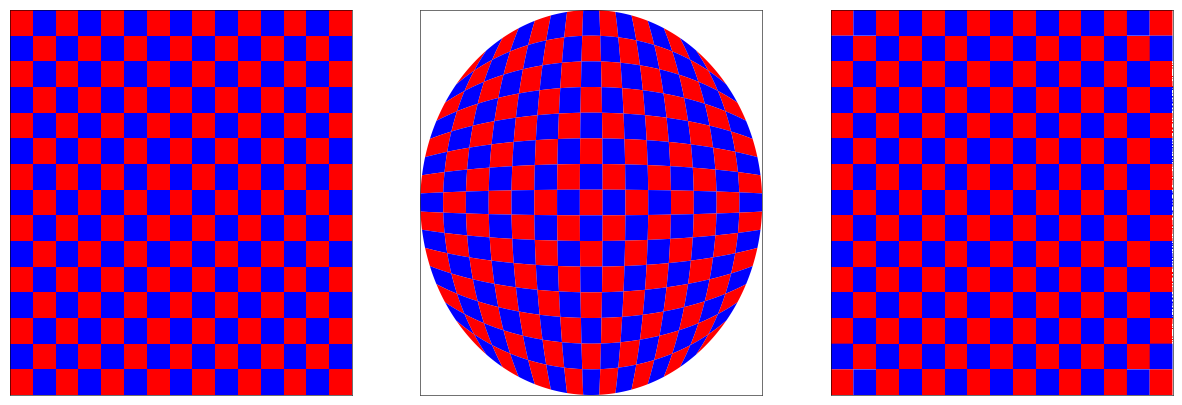

In [3]:
fig , (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sketch_grid_squares(points.T, 50, [res_sqr, res_sqr], ax1)
sketch_grid_squares(points2.T, 50, [res_sqr, res_sqr], ax2)
sketch_grid_squares(points3.T, 50, [res_sqr, res_sqr], ax3)
ax1.set_xlim([-1,1])
ax1.set_ylim([-1,1])
ax2.set_xlim([-1,1])
ax2.set_ylim([-1,1])
ax3.set_xlim([-1,1])
ax3.set_ylim([-1,1])

In [4]:
origin = [0,0]
radius = 1
image = np.array([[1, 3, 3, 3, 2, 4, 5, 2],
                  [4, 4, 3, 8, 8, 1, 1, 1],
                  [8, 4, 9, 6, 0, 1, 1, 5],
                  [1, 0, 4, 1, 1, 1, 1, 3],
                  [2, 0, 3, 1, 1, 1, 1, 5],
                  [3, 0, 0, 3, 1, 1, 2, 1],
                  [3, 8, 8, 8, 8, 8, 4, 4],
                  [4, 2, 3, 5, 1, 1, 5, 1]])

coeff = DiskTextureCoefficient("test", image, radius = radius, origin = origin)
bbox = [[origin[0] - radius * 1.2, origin[1] - radius * 1.2],
        [origin[0] + radius * 1.2, origin[1] + radius * 1.2]]


Text(0.5, 1.0, 'FNC')

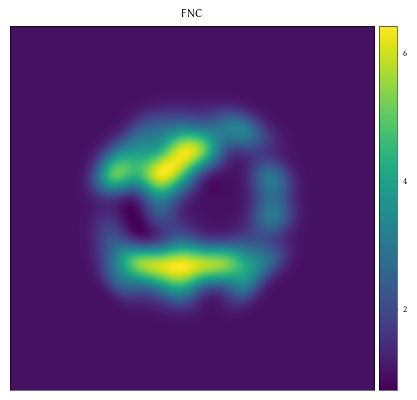

In [6]:
resolution = [512, 512]
spp = 128
points = create_image_points(bbox, resolution, spp)
fnc_vals = coeff.get_value(points)
image_, tensor_ = create_image_from_result(fnc_vals, resolution)
fig, (ax1) = plt.subplots(1, 1, figsize=[5, 5])
plot_image(image_[0], ax1)
ax1.set_title("FNC")


In [7]:
fnc_vals_fdx = coeff.get_value(points +Point2f(1, 0) * fd_step)
fnc_vals_fdy = coeff.get_value(points +Point2f(0, 1) * fd_step)
fnc_vals_fdx_ = coeff.get_value(points -Point2f(1, 0) * fd_step)
fnc_vals_fdy_ = coeff.get_value(points -Point2f(0, 1) * fd_step)
image, tensor = create_image_from_result(fnc_vals, resolution)
image_fdx, tensor_fdx = create_image_from_result((fnc_vals_fdx - fnc_vals_fdx_) / (2 * fd_step), resolution)
image_fdy, tensor_fdy = create_image_from_result((fnc_vals_fdy - fnc_vals_fdy_) / (2 * fd_step), resolution)
grad, laplacian = coeff.get_grad_laplacian(points)
grad_x, grad_x_tensor = create_image_from_result(grad[0], resolution)
grad_y, grad_x_tensor = create_image_from_result(grad[1], resolution)


laplacian_fd = ((fnc_vals_fdx + fnc_vals_fdx_ - 2 * fnc_vals) / dr.square(fd_step) 
                +(fnc_vals_fdy + fnc_vals_fdy_ - 2 * fnc_vals) / dr.square(fd_step))

laplacian_fd_im, laplacian_fd_tensor = create_image_from_result(laplacian_fd, resolution)
laplacian_fnc_im, laplacian_fnc_tensor = create_image_from_result(laplacian, resolution)


Text(0.5, 0.98, 'Grad X')

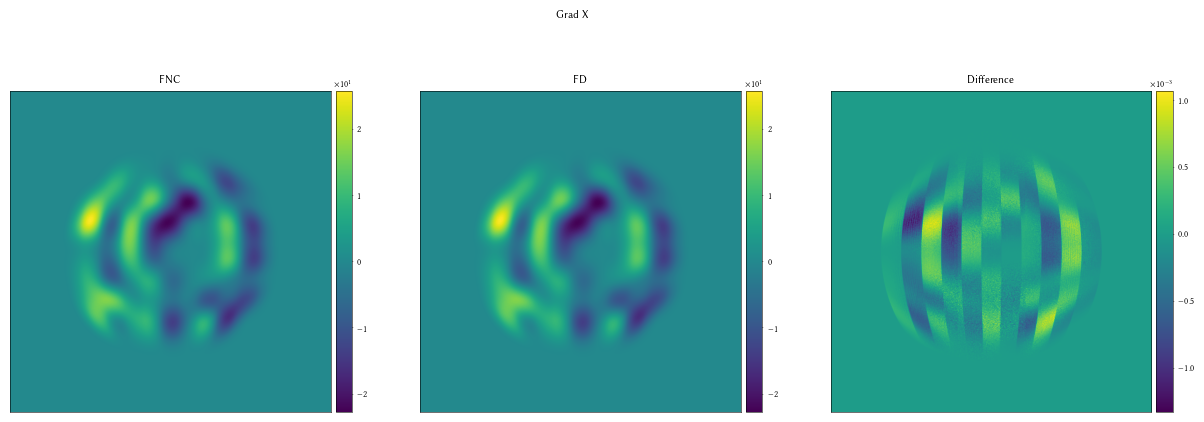

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[15, 5])
plot_image(grad_x[0], ax1)
ax1.set_title("FNC")
plot_image(image_fdx[0], ax2)
ax2.set_title("FD")
plot_image((image_fdx - grad_x)[0], ax3)
ax3.set_title("Difference")
fig.suptitle("Grad X")


Text(0.5, 0.98, 'Grad Y')

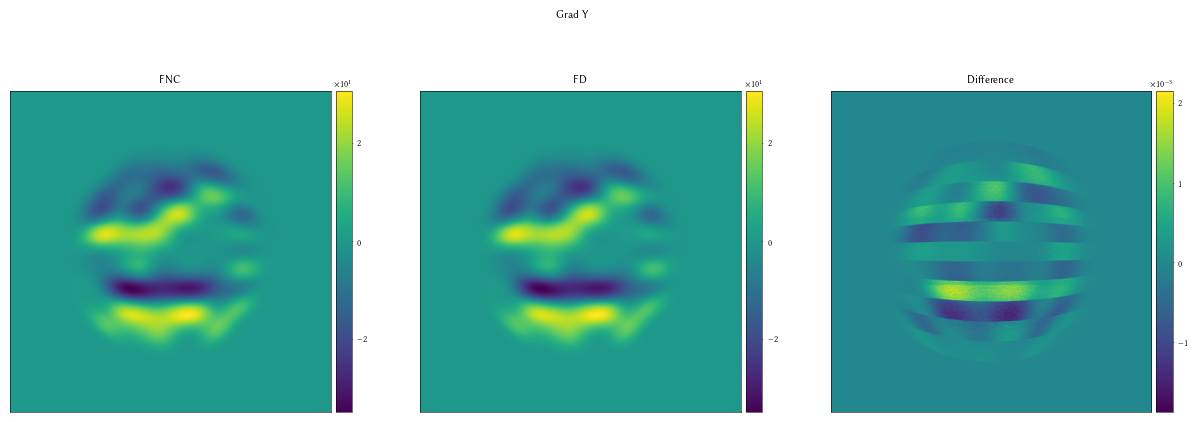

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[15, 5])
plot_image(grad_y[0], ax1)
ax1.set_title("FNC")
plot_image(image_fdy[0], ax2)
ax2.set_title("FD")
plot_image((image_fdy - grad_y)[0], ax3)
ax3.set_title("Difference")
fig.suptitle("Grad Y")

Text(0.5, 0.98, 'Laplacian')

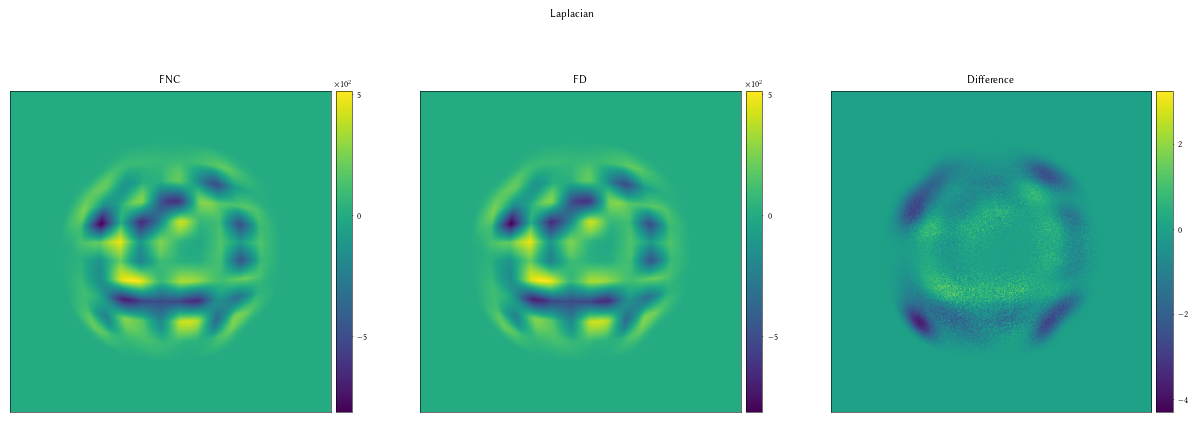

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[15, 5])
plot_image(laplacian_fnc_im[0], ax1)
ax1.set_title("FNC")
plot_image(laplacian_fd_im[0], ax2)
ax2.set_title("FD")
plot_image((laplacian_fd_im - laplacian_fnc_im)[0], ax3)
ax3.set_title("Difference")
fig.suptitle("Laplacian")